In [37]:
# Standard Library Imports (if any)

# Third-party Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display, HTML

# Local Module Imports
from utils import *
from data import *


In [38]:
data = DataManager(
    raw_dir = "../data/raw",
    save_dir = "../data/clean"
)
# data.clean_and_save_data()

# Access datasets
cpis = data.get_dataset("cpis")
ds = data.get_dataset("ds")
fed = data.get_dataset("fed")
wb = data.get_dataset("wb")
wfe = data.get_dataset("wfe")

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from data.manager import *
from utils import *
from adjustText import adjust_text

def scatter_countries(x, y, codes, x_label, y_label, title, save=None):
    # Perform OLS regression
    X = sm.add_constant(x)
    y = y
    model = sm.OLS(y, X).fit()
    y_pred = model.predict(X)
    
    # Save regression summary to text file
    summary_text = model.summary().as_text()
    if save is not None:
        with open(f"./output/results/{save}.txt", "w") as f:
            f.write(summary_text)

    # Plot data
    plt.figure()
    plt.scatter(x, y, color='blue', s=10, label="Countries")

    # Add data labels
    texts = []
    for i, code in enumerate(codes):
        text = plt.text(x.iloc[i], y.iloc[i], code, fontsize=6)
        texts.append(text)
    adjust_text(texts, force_text=0.25, arrowprops=dict(arrowstyle="->", color='blue'))

    # Plot regression line and do layout
    x_min, x_max = x.min(), x.max()     
    y_min, y_max = y_pred[x.argmin()], y_pred[x.argmax()]
    plt.plot([x_min, x_max], [y_min, y_max], color='red', linewidth=2, label='Regression line')
    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    if save is not None:
        plt.savefig(f"./output/figures/{save}")

C:\Users\nilsv\AppData\Local\Temp\ipykernel_15284\2437154737.py:8: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = ds.pct_change(axis=1, fill_method="ffill")
C:\Users\nilsv\AppData\Local\Temp\ipykernel_15284\203938713.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_min, y_max = y_pred[x.argmin()], y_pred[x.argmax()]
C:\Users\nilsv\AppData\Local\Temp\ipykernel_15284\203938713.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beha

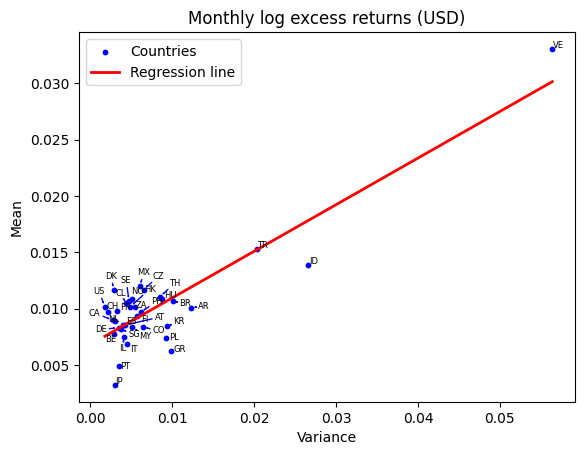

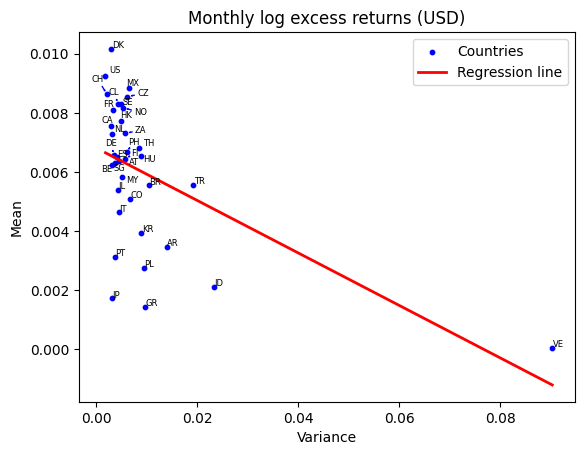

In [49]:
codes_to_drop = ["UK"]

# Align the risk-free rate data with the returns data
fed = fed.reindex(columns=ds.columns)
fed = annual_to_monthly_return(fed)

# Calculate returns and risk-free rate
returns = ds.pct_change(axis=1, fill_method="ffill")
risk_free_rate = fed.loc["FEDFUNDS"]

# Simple excess returns
excess_returns = returns.subtract(risk_free_rate, axis=1)
mean_excess = excess_returns.mean(axis=1)
var_excess = excess_returns.var(axis=1)

# Log excess returns
log_returns = np.log(1 + returns)
log_risk_free = np.log(1 + risk_free_rate)
log_excess_returns = log_returns.subtract(log_risk_free, axis=1)
mean_log_excess = log_excess_returns.mean(axis=1)
var_log_excess = log_excess_returns.var(axis=1)
    
scatter_countries(x=var_excess,
                  y=mean_excess,
                  codes=DS.CODES,
                  x_label="Variance",
                  y_label="Mean",
                  title="Monthly log excess returns (USD)",
                  save=None,)

scatter_countries(x=var_log_excess,
                  y=mean_log_excess,
                  codes=DS.CODES,
                  x_label="Variance",
                  y_label="Mean",
                  title="Monthly log excess returns (USD)",
                  save=None,)
